### Import libraries

In [2]:
import numpy as np 
# import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cvxEDA
import datetime
from scipy import stats
from mpl_toolkits import mplot3d
import pylab as pl
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from scipy.stats import ks_2samp
from scipy.stats import ttest_1samp, wilcoxon, ttest_ind, mannwhitneyu
from sklearn.preprocessing import normalize
sns.set(color_codes = True)
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# Import data day 1

In [3]:
# Sampling frequency 4Hz ~= 0.25s
#6/27/2018
fl_eda_7 = pd.read_csv('../data/day_7/EDA.csv' , header= None)
fl_eda_7.columns  = ['eda']
fl_eda_freq_7 = fl_eda_7.iloc[1].values
print(len(fl_eda_7))
print('freq: ', fl_eda_freq_7)
fl_eda_7.head(10)

5540
freq:  [4.]


,eda
0,1.530656e+09
1,4.000000e+00
2,0.000000e+00
3,3.715400e-02
4,4.356000e-02
5,4.356000e-02
6,4.484100e-02
7,4.868500e-02
8,4.356000e-02
9,4.484100e-02


In [4]:
print(len(fl_eda_7))
fl_eda_7.head(5)

5540


,eda
0,1.530656e+09
1,4.000000e+00
2,0.000000e+00
3,3.715400e-02
4,4.356000e-02


## Convert time

In [5]:
fl_init_time_7 = datetime.datetime.fromtimestamp(fl_eda_7.iloc[0]).strftime('%Y-%m-%d %H:%M:%S')
fl_init_time_7

'2018-07-03 15:11:35'

In [6]:
fl_eda_7 = fl_eda_7.iloc[3:]

In [7]:
fl_time_eda_7 = pd.date_range(start=fl_init_time_7, periods=len(fl_eda_7), 
                              freq=str(1/int(fl_eda_freq_7))+'S')
fl_time_eda_7

DatetimeIndex([       '2018-07-03 15:11:35', '2018-07-03 15:11:35.250000',
               '2018-07-03 15:11:35.500000', '2018-07-03 15:11:35.750000',
                      '2018-07-03 15:11:36', '2018-07-03 15:11:36.250000',
               '2018-07-03 15:11:36.500000', '2018-07-03 15:11:36.750000',
                      '2018-07-03 15:11:37', '2018-07-03 15:11:37.250000',
               ...
               '2018-07-03 15:34:36.750000',        '2018-07-03 15:34:37',
               '2018-07-03 15:34:37.250000', '2018-07-03 15:34:37.500000',
               '2018-07-03 15:34:37.750000',        '2018-07-03 15:34:38',
               '2018-07-03 15:34:38.250000', '2018-07-03 15:34:38.500000',
               '2018-07-03 15:34:38.750000',        '2018-07-03 15:34:39'],
              dtype='datetime64[ns]', length=5537, freq='250L')

In [8]:
fl_eda_7 = fl_eda_7.set_index(fl_time_eda_7, drop =True)
fl_eda_7 = fl_eda_7[:]
fl_eda_7 = fl_eda_7.dropna()
print(len(fl_eda_7))
fl_eda_7.head()

5537


,eda
2018-07-03 15:11:35.000,0.037154
2018-07-03 15:11:35.250,0.043560
2018-07-03 15:11:35.500,0.043560
2018-07-03 15:11:35.750,0.044841
2018-07-03 15:11:36.000,0.048685


# Remove outliers

In [9]:
fl_exp7 = fl_eda_7.copy()#example dataset of normally distributed data. 


fl_exp7= fl_exp7[np.abs(fl_exp7.eda-fl_exp7.eda.mean())<=(3*fl_exp7.eda.std())] #keep only the ones that are within +3 to -3 standard deviations in the column 'Data'.
fl_exp7= fl_exp7[~(np.abs(fl_exp7.eda-fl_exp7.eda.mean())>(3*fl_exp7.eda.std()))] #or if you prefer the other way around
fl_exp7 = fl_exp7.dropna()
print(len(fl_exp7))
fl_exp7.head()

5537


,eda
2018-07-03 15:11:35.000,0.037154
2018-07-03 15:11:35.250,0.043560
2018-07-03 15:11:35.500,0.043560
2018-07-03 15:11:35.750,0.044841
2018-07-03 15:11:36.000,0.048685


## Time marks

In [10]:
tags_7 = pd.read_csv('../data/marks/7.3.csv' , header= None)
tags_7 = tags_7.drop(tags_7.columns[2],axis=1)
tags_7.columns  =  ['tagged_time','presence']
tags_7.head()

,tagged_time,presence
0,2018-07-03 15:30:59.992,0
1,2018-07-03 15:28:06.164,0
2,2018-07-03 15:26:39.000,0
3,2018-07-03 15:23:30.496,0
4,2018-07-03 15:21:12.702,0


In [11]:
tags_7.tagged_time[0]

'2018-07-03 15:30:59.992'

## Separate Data

In [12]:
cat_1 = fl_exp7.loc['2018-07-03 15:20:30.000':'2018-07-03 15:30:55.000']
cat_1.head()

,eda
2018-07-03 15:20:30.000,0.149898
2018-07-03 15:20:30.250,0.153741
2018-07-03 15:20:30.500,0.153741
2018-07-03 15:20:30.750,0.151179
2018-07-03 15:20:31.000,0.151179


# Visualization

0.181039392971246


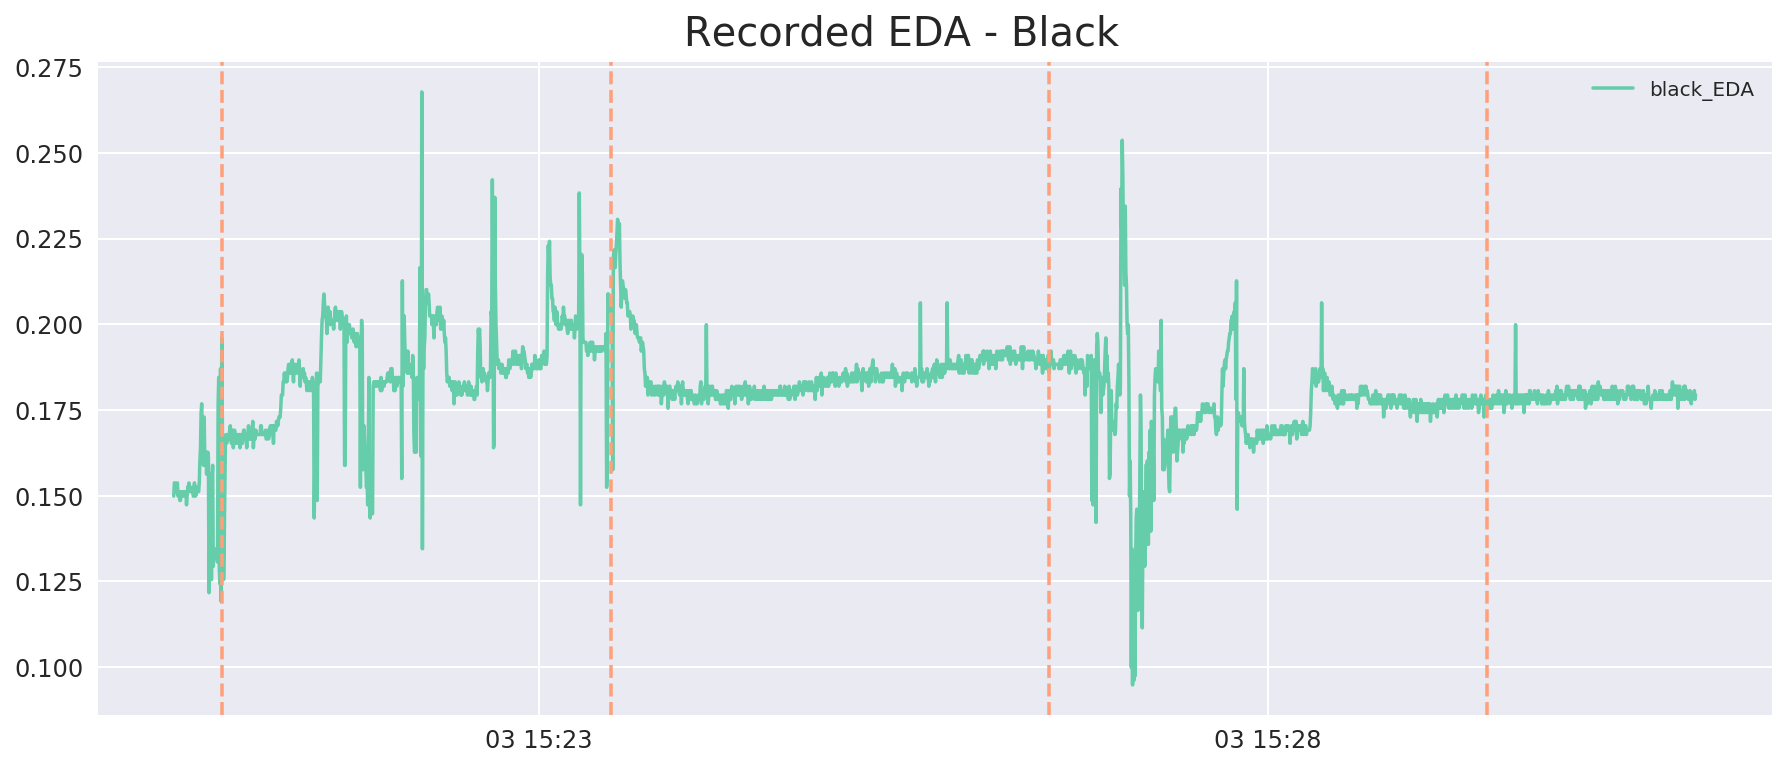

In [26]:
plt.figure(figsize=(15,6))
plt.plot(cat_1['eda'],color ='mediumaquamarine')
plt.figtext(.5,.9,'Recorded EDA - Black ', fontsize=20, ha='center')
plt.legend(['black_EDA'],loc=1,fontsize='medium')
plt.axvline(x = '2018-07-03 15:20:50.000',color = 'lightsalmon',linestyle='--')
plt.axvline(x = '2018-07-03 15:23:30.000',color = 'lightsalmon',linestyle='--')
plt.axvline(x = '2018-07-03 15:26:30.000',color = 'lightsalmon',linestyle='--')
plt.axvline(x = '2018-07-03 15:29:30.000',color = 'lightsalmon',linestyle='--')
# # plt.axvline(x = tags_2.tagged_time[5],color = 'c',linestyle='--')

eda_mean = np.mean(cat_1.eda)
print(eda_mean)
# plt.axhline(y = eda_mean, color = 'limegreen', linestyle = '--')
# plt.savefig('black-eda.png', transparent=True)

plt.show()


# cvsEDA

In [17]:
params = {'legend.fontsize': 'large',
          'figure.figsize': (10, 8),
         'axes.labelsize': 'large',
         'axes.titlesize':'large',
         'xtick.labelsize':'large',
         'ytick.labelsize':'large'}
pl.rcParams.update(params)

In [18]:
y1 = np.asarray(cat_1.eda)
y1[:10]

array([0.149898, 0.153741, 0.153741, 0.151179, 0.151179, 0.15246 ,
       0.153741, 0.149898, 0.151179, 0.151179])

In [19]:
yn1 = (y1 - y1.mean()) / y1.std()
Fs = 4.
[r1, p1, t1, l1, d1, e1, obj1] = cvxEDA.cvxEDA(yn1, 1./Fs)

# pl.rcParams['figure.figsize'] = (30,20)
tm1 = pl.arange(1., len(y1)+1.) / Fs


     pcost       dcost       gap    pres   dres
 0: -9.0992e+02 -7.8840e+02  2e+04  1e+02  1e+00
 1: -9.9176e+02 -4.1465e+03  4e+03  3e+01  3e-01
 2: -1.0353e+03 -2.2137e+03  1e+03  7e+00  8e-02
 3: -1.0621e+03 -1.6759e+03  6e+02  3e+00  3e-02
 4: -1.0792e+03 -1.4995e+03  4e+02  2e+00  2e-02
 5: -1.0927e+03 -1.3409e+03  2e+02  8e-01  8e-03
 6: -1.1025e+03 -1.2492e+03  1e+02  3e-01  4e-03
 7: -1.1088e+03 -1.1785e+03  7e+01  1e-01  1e-03
 8: -1.1135e+03 -1.1353e+03  2e+01  3e-02  3e-04
 9: -1.1172e+03 -1.1226e+03  5e+00  6e-03  6e-05
10: -1.1182e+03 -1.1205e+03  2e+00  1e-03  1e-05
11: -1.1189e+03 -1.1194e+03  5e-01  6e-05  6e-07
12: -1.1191e+03 -1.1192e+03  9e-02  8e-06  8e-08
13: -1.1192e+03 -1.1192e+03  1e-02  8e-07  8e-09
14: -1.1192e+03 -1.1192e+03  1e-03  8e-08  8e-10
15: -1.1192e+03 -1.1192e+03  1e-04  4e-09  4e-11
16: -1.1192e+03 -1.1192e+03  6e-06  2e-10  2e-12
17: -1.1192e+03 -1.1192e+03  1e-07  4e-12  2e-13
Optimal solution found.


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.5/dist-packages/matplotlib/__init__.py:805: MatplotlibDeprecationWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  mplDeprecation)
/usr/local/lib/python3.5/dist-packages/matplotlib/rcsetup.py:155: MatplotlibDeprecationWarning: axes.hold is deprecated, will be removed in 3.0
  mplDeprecation)


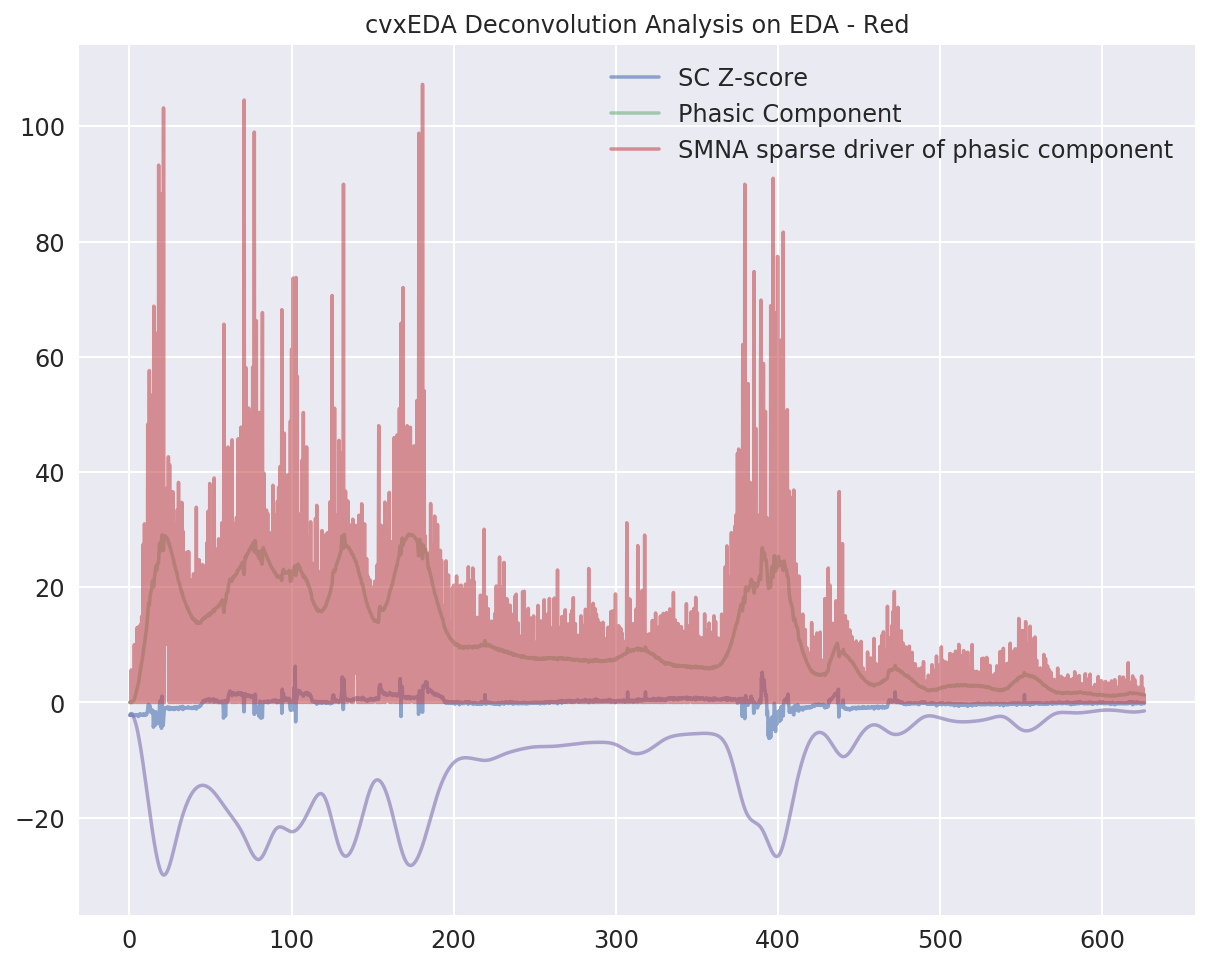

In [27]:
pl.hold(True)
pl.plot(tm1, yn1,alpha = 0.6)

pl.plot(tm1, r1,alpha = 0.5)
pl.plot(tm1, p1,alpha = 0.6)
pl.plot(tm1, t1,alpha = 0.6)


pl.title('cvxEDA Deconvolution Analysis on EDA - Red')
pl.legend(['SC Z-score','Phasic Component','SMNA sparse driver of phasic component',
           ])
plt.savefig('red-cvxEDA.png', transparent=True)
plt.show()

## Logarithm 

In [41]:
fl_exp2['eda'] = np.log(fl_exp2['eda'])
fl_exp2.head(5)

,eda
2018-06-27 17:30:03.000,-0.181527
2018-06-27 17:30:03.250,0.166735
2018-06-27 17:30:03.500,0.482208
2018-06-27 17:30:03.750,0.740791
2018-06-27 17:30:04.000,0.789750


In [ ]:
log_eda_mean = np.mean(fl_exp2.eda)
print(log_eda_mean)
plt.figure(figsize=(15,6))
plt.plot(fl_exp2['eda'],color ='limegreen')
plt.figtext(.5,.9,'Stress response to cold showermodulated by social presence experiment- EDA ', fontsize=20, ha='center')
plt.legend(['EDA'],loc=1,fontsize='medium')
plt.axhline(y = log_eda_mean,color = 'salmon',linestyle='--')
plt.axvline(x = tags_2.tagged_time[0],color = 'hotpink',linestyle='--')
plt.axvline(x = tags_2.tagged_time[1],color = 'hotpink',linestyle='--')
plt.axvline(x = tags_2.tagged_time[3],color = 'c',linestyle='--')
plt.axvline(x = tags_2.tagged_time[4],color = 'c',linestyle='--')
plt.axvline(x = tags_2.tagged_time[5],color = 'c',linestyle='--')
plt.show()